<a href="https://colab.research.google.com/github/fox-n/ML_course_homeworks/blob/main/Copy_of_HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

!pip -q install gdown
import gdown

In [ ]:
url_application_data_csv_zip = "https://drive.google.com/file/d/1ujV3Ddy6TYDW__pxXPMXhK9us21xOSVw/view?usp=sharing"
gdown.download(url_application_data_csv_zip, "medical-charges.csv", fuzzy=True)

medical_df = pd.read_csv("medical-charges.csv")

Downloading...
From: https://drive.google.com/uc?id=1ujV3Ddy6TYDW__pxXPMXhK9us21xOSVw
To: /content/medical-charges.csv
100%|██████████| 55.6k/55.6k [00:00<00:00, 28.7MB/s]


In [ ]:
medical_df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [16]:
medical_df.sex.value_counts()

,count
sex,
male,676
female,662


Ідеї щодо прогнозування колонки charges:

1. Можна проаналізувати які з колонок найбіше і найменше впливають на зростання цільової змінної - ті, що впливають найбільше і спричиняють найбільші викиди - аналізувати окремо.
2. Поділити на категорії. Для кожної категорії розрахувати якусь середню суму до оплати
3. На мою думку найбільш впливою ознакою може бути вік людини.

In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [25]:
#розподіл мед. зборів із розбиттям за категоріальною ознакою Стать
fig = px.histogram(medical_df,#[medical_df.sex == 'male'],
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['violet', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Спостереження:
Середнє значення мед.зборів майже однакове для чоловіків і жінок. Для обох категорій, в більшості випадків, мед. збори не перевищують 14к. Для чоловіків "типові" мед. збори, які ще не попадають в категорію виключень, знаходяться в більш широкому діапазоні.

In [18]:
#розподіл мед. зборів із розбиттям за категоріальною ознакою Регіон
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'grey', 'blue', 'darkblue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Спостереження:
Середнє значення мед.зборів для людей з різних районів не дуже відрізняється. Проте, діапазон мед.зборів для людей з південо-східного та північно-східного районів ширший, ніж для людей з 2х інших районів.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [30]:
#розподіл стовпця Region відносно стовпця Smoker

px.histogram(medical_df, x='smoker', color='region', title='Region')

Спостереження:
Значення доволі рівномірно розподілені за районами. Складається враження, ніби тут спеціально вибирали приблизно однакову кількість людей з різних районів. Відповідно - співвідношення курців до некурців з кожного району теж буде приблизно однаковим.


In [29]:
#розподіл стовпця Children відносно стовпця Smoker

px.histogram(medical_df, x='smoker', color='children', title='Children')

Спостереження:
Людей, які зазначили, що вони не курять, значно більше, і також серед них більше багатодітних. Відносна частка людей, які не мають дітей - найбільша, як серед тих, хто курить, так і середж тих, хто не курить.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [37]:
px.violin(medical_df, x='children', y = 'charges', title='Charges vs Children')

Спостереження:
Середній мед. збір для людей з 1 дітиною та 5 дітьми дуже подібні. В той самий час - люди без дітей в середньому мають менший мед. збір ніж люди з 3-4 дітьми. Розкид можливих медичних зборів найбільший у людей без дітей та людей з 3ма дітьми.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [59]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [60]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [61]:
def estimate_charges(age, w, b):
    return w * age + b

In [83]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);




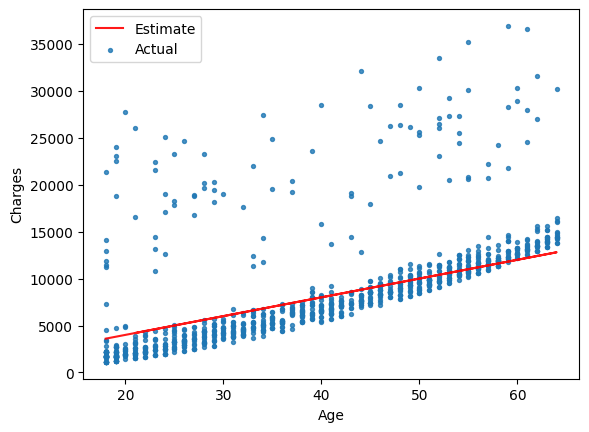

In [119]:
try_parameters(non_smoker_df, 200, 0)

Спостереження:
Я спробувала значення
100;0 - лінія моделі тепер починається десь в районі сукупності значень, але нахил не співпадає.
500;2000 - нахил тепер більш схожий на те, що треба, проте лінія моделі зміщена по осі Y
200; 0 - найбільш наближена до основного розподілення даних

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [122]:
def rmse(df, w, b):
  age = df.age
  targets = df.charges
  predictions = estimate_charges(age, w, b)
  accuracy = np.sqrt(np.mean((np.square(predictions - targets))))
  return accuracy


In [123]:
rmse(non_smoker_df, 100, 0)

np.float64(6891.549037717145)

In [124]:
rmse(non_smoker_df, 500, 2000)

np.float64(14431.177143746354)

In [139]:
rmse(non_smoker_df, 200, 0)

np.float64(4790.154131157637)

In [132]:
non_smoker_df.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


Висновки: з тими значеннями, які я використовувала, найменше значення помилки було 4790. Вона приблизно в 2р менша за середнє значення та трохи менша за std. Тобто втрати не найгірш, але точно можна краще.
Моя подальша стратегія була би у написанні функції, яка в залежності від результату розрахунку втрат буде підбирати на вхід функції нове значення. Що по суті і є методами оптимізації.